# More difficult problems

# Load Tools

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix

def plot_cm(mat):
  classes = np.arange(cm.shape[0])
  plt.imshow(mat, cmap=plt.cm.Blues)
  for (j,i),label in np.ndenumerate(mat):
    plt.text(i,j,np.round(label,2),ha='center',va='center')

  plt.colorbar()
  plt.title('Confusion Matrix')
  plt.xlabel('True label')
  plt.ylabel('Pred label')
  plt.xticks(classes)
  plt.yticks(classes)
  plt.show()

# Mock Data

Shapes: X= (300, 2) y = (300,) 


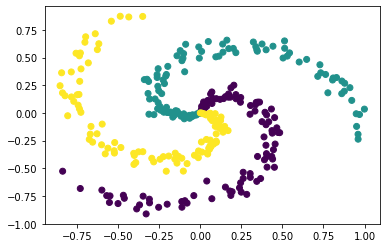

In [2]:
N = 100 # number of points per class
K = 3   # number of classes

X = np.zeros((N*K, 2)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j

print('Shapes: X= {} y = {} '. format(X.shape, y.shape))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

The main challenge with such data is the *non-linear* structure. Therefore we need some non-linear tools

**Quiz**: How many variables? How many labels? How many samples ?

# From Neurons to Networks

## Adding Layers and Non-Linearities

<div>
   <img src="https://github.com/thomasmanke/ABS/raw/main/figures/ANN_ReLU.jpg",  width="1200">
</div>

In [3]:
nc = 3 # number of classes
loss_name='sparse_categorical_crossentropy'   # for integer labels
acc='sparse_categorical_accuracy'             # additional metrics to track

model = tf.keras.Sequential(name='my_spiral_model')
model.add(tf.keras.layers.Dense(8, input_dim=2)) # basically the first internal layer also creates the input layer with input_dim
model.add(tf.keras.layers.Activation('relu')) # ReLU sometimes not considered it's own layer but attached to the previous one
#could also have been
#model.add(tf.keras.layers.Dense(8, input_dim=2, activation='relu'))

model.add(tf.keras.layers.Dense(nc, activation='softmax'))

model.compile(optimizer='sgd', loss=loss_name, metrics=[acc])
model.summary()

Model: "my_spiral_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 24        
_________________________________________________________________
activation (Activation)      (None, 8)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 27        
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


2022-06-17 09:34:38.962987: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-06-17 09:34:38.964687: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-17 09:34:38.965269: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


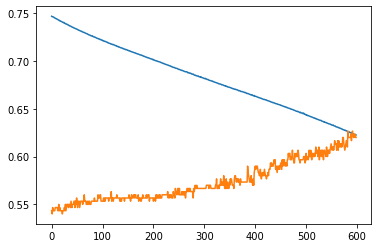

In [6]:
fh = model.fit(X,y, epochs=600, verbose=0)
plt.plot(fh.history['loss'][1:])
plt.plot(fh.history[acc][1:])
plt.show()

[loss, accuracy] =  [0.6219525337219238, 0.6233333349227905]


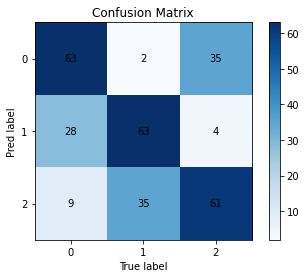

In [7]:
eval = model.evaluate(x=X, y=y, verbose=0)
print('[loss, accuracy] = ', eval)

yp = model.predict(X)
yp1 = np.argmax(yp, axis=1)

cm = confusion_matrix(yp1, y)
plot_cm(cm)



## Saving Models

Fitting is expensive. It's good practice to save good models. They can be shared or reloaded later - with all parameters in place.

In [8]:
# save: will create a directory of specified name
model.save('model')

# load
model2 = tf.keras.models.load_model('model')

2022-06-17 09:55:33.943356: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: model/assets


## Group Task (30 min): Changing and comparing models

You may have to rerun the fit for a more decent performance than in the lecture.

Make sure have saved your best model as "model1"

- **Group 1:** **Remove the non-linear activation layer** from the model and save the resulting model as model2. 

- **Group 2:** **Add an additional layer** with non-linear activation function (e.g. 'relu') before the final output layer and save the resulting model as model 2.

Report your results back to all. Summarize the model. What can you say about the performance on the training data? 

The code cell below should be ready to go without further editing. It may help to visualize differences between the two models, but it requires two distinct models named "model1" and "model2"




Model: "my_spiral_enhanced_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 8)                 24        
_________________________________________________________________
activation_5 (Activation)    (None, 8)                 0         
_________________________________________________________________
dense_15 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_16 (Dense)             (None, 3)                 51        
Total params: 219
Trainable params: 219
Non-trainable params: 0
_________________________________________________________________


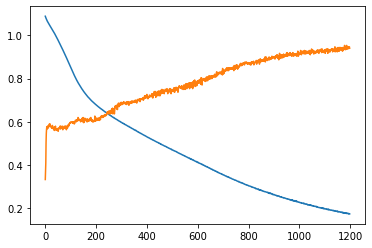

INFO:tensorflow:Assets written to: enhanced/assets


In [19]:
nc = 3 # number of classes
loss_name='sparse_categorical_crossentropy'   # for integer labels
acc='sparse_categorical_accuracy'             # additional metrics to track

enhanced_model = tf.keras.Sequential(name='my_spiral_enhanced_model')
enhanced_model.add(tf.keras.layers.Dense(8, input_dim=2)) # basically the first internal layer also creates the input layer with input_dim
enhanced_model.add(tf.keras.layers.Activation('relu')) # ReLU sometimes not considered it's own layer but attached to the previous one
enhanced_model.add(tf.keras.layers.Dense(16, activation='relu'))
#could also have been
#enhanced_model.add(tf.keras.layers.Dense(8, input_dim=2, activation='relu'))

enhanced_model.add(tf.keras.layers.Dense(nc, activation='softmax'))

enhanced_model.compile(optimizer='sgd', loss=loss_name, metrics=[acc])
enhanced_model.summary()


fh_enhanced = enhanced_model.fit(X,y, epochs=1200, verbose=0) #, validation_split=0.2)

plt.plot(fh_enhanced.history['loss'][1:])
plt.plot(fh_enhanced.history[acc][1:])
plt.show()


# save: will create a directory of specified name
enhanced_model.save('enhanced')


[loss, accuracy] =  [0.17209026217460632, 0.9433333277702332]


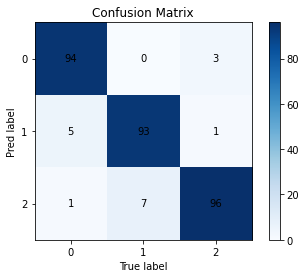

In [20]:
eval = enhanced_model.evaluate(x=X, y=y, verbose=0)
print('[loss, accuracy] = ', eval)

yp = enhanced_model.predict(X)
yp1 = np.argmax(yp, axis=1)

cm = confusion_matrix(yp1, y)
plot_cm(cm)



### Decision Boundaries

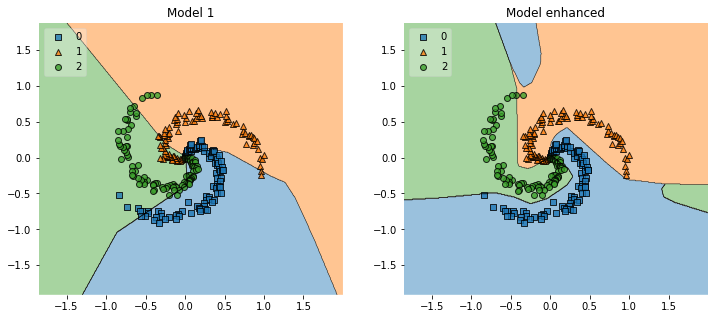

In [21]:
# Vizualizing Decision Boundaries
# This is feasible only for 2D data in higher dim it becomes useless
from mlxtend.plotting import plot_decision_regions

# Trick from http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/
# see Example 12

class Onehot2Int(object):
    def __init__(self, model):
        self.model = model

    def predict(self, X):
        y_pred = self.model.predict(X)
        return np.argmax(y_pred, axis=1)


plt.figure(figsize=(12, 5))

model1 = tf.keras.models.load_model('model')
model1_adj = Onehot2Int(model1)
ax = plt.subplot(1, 2, 1)
plot_decision_regions(X, y, clf=model1_adj, legend=2)
plt.title('Model 1')

model2 = tf.keras.models.load_model('enhanced')
model2_adj = Onehot2Int(model2)
ax = plt.subplot(1, 2, 2)
plot_decision_regions(X, y, clf=model2_adj, legend=2)
plt.title('Model enhanced')

plt.show()

**Lesson**: 
The problem was more difficult because the data has non-linear patterns.

- Simple non-linear activation functions may help to separate more complex data structures.
- We need to protect against over-fitting

# Summary of the first part

<div>
   <img src="https://github.com/thomasmanke/ABS/raw/main/figures/ANN_001_Summary.jpg",  width="1000">
</div>